In [1]:
def show_ratio(df):
	df['mask'] = df['ans'].apply(lambda x: 0 if x<6 else (1 if x<12 else 2))
	df['gender'] = df['ans'].map(lambda x: 0 if x in [0, 1, 2, 6, 7, 8, 12, 13, 14] else 1)
	display(df['mask'].value_counts(normalize=True))
	display(df['gender'].value_counts(normalize=True))

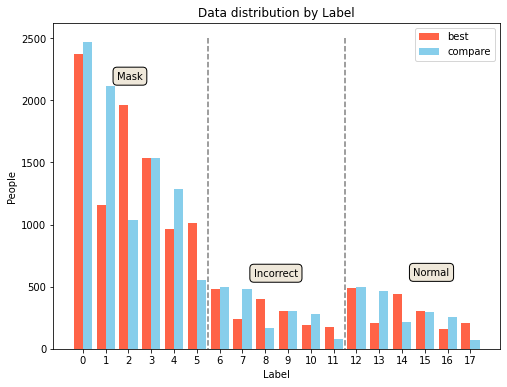

0    0.714444
2    0.143095
1    0.142460
Name: mask, dtype: float64

0    0.614444
1    0.385556
Name: gender, dtype: float64

0    0.714365
1    0.143095
2    0.142540
Name: mask, dtype: float64

0    0.630079
1    0.369921
Name: gender, dtype: float64

In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

best_1 = pd.read_csv('/opt/ml/image-classification-level1-12/templates/pro_hun/output/sub/0825/sub_2021-08-25_092537.csv')
best_2 = pd.read_csv('/opt/ml/image-classification-level1-12/templates/pro_hun/output/sub/0825/sub_2021-08-25_145639.csv')
compare_path = input('비교하고자하는 결과의 경로를 입력해주세요: ')
pred_1 = pd.read_csv(compare_path)

plt.figure(figsize=(8, 6))

label_data = best_1['ans'].value_counts().sort_index()
compare_data = pred_1['ans'].value_counts().sort_index()
plt.bar(label_data.index-0.2, label_data, color='tomato', width=0.4, label='best')
plt.bar(compare_data.index+0.2, compare_data, color='skyblue', width=0.4, label='compare')

# plt.bar(label_data[6:12].index-0.5, label_data[6:12], color='tomato', width=0.5, label='best')
# plt.bar(label_data[12:].index-0.5, label_data[12:], color='tomato', width=0.5, label='best')
plt.xticks(label_data.index)
plt.annotate('Mask', (1.5, label_data.max()-200), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.annotate('Incorrect', (7.5, label_data[6:12].max()+100), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.annotate('Normal', (14.5, label_data[12:].max()+100), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.plot([5.5, 5.5], [2500, 0], linestyle='--', color='gray')
plt.plot([11.5, 11.5], [2500, 0], linestyle='--', color='gray')
plt.xlabel('Label')
plt.ylabel('People')
plt.title('Data distribution by Label')
plt.legend()
plt.show()

show_ratio(best_1)
show_ratio(pred_1)

In [10]:
pred_1['ans'].value_counts()

0     2467
1     2119
3     1536
4     1289
2     1037
5      553
6      498
12     497
7      481
13     462
9      301
15     299
10     280
16     255
14     213
8      165
11      78
17      70
Name: ans, dtype: int64